In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

sns.set(color_codes=True)
sns.set(font_scale=True)
sns.set_color_codes()

In [3]:
df = pd.read_csv("../../milky_white_mushroom/results/cazymes/shiitake/filtered_hits.tsv",delimiter="\t")

In [4]:
df

,Gene ID,HMMER,Hotpep,DIAMOND,#ofTools
0,jgi|LedB17_3|100380|GENE14242.1,GT50(159-425),GT50(1),GT50,3
1,jgi|LedB17_3|100483|GENE14269.1,GH7(20-450),GH7(1)+CBM1(1),CBM1+GH7,3
2,jgi|LedB17_3|100547|g14336.t1,GH10(101-403),GH10(37)+CBM1(2),CBM1+GH10+3.2.1.8,3
3,jgi|LedB17_3|101015|g14480.t1,CE4(209-318),CE4(145),CE4,3
4,jgi|LedB17_3|101063|GENE211746.1,GH43_13(10-305),-,GH43_13,2
...,...,...,...,...,...
318,jgi|LedB17_3|98397|GENE212952.1,-,AA1(22),AA1,2
319,jgi|LedB17_3|115859|GENE211391.1,-,GT0(19),GT0,2
320,jgi|LedB17_3|120524|GENE09187.1,-,GT20(4),GT20,2
321,jgi|LedB17_3|142654|GENE204429.1,-,GT31(22),GT31,2


In [5]:
from typing import Dict

from collections import Counter

def clean_label(element):
    indexes_removed = re.sub(r"\([0-9]+-[0-9]+\)","",element)
    return re.sub(r"_[0-9]+","",indexes_removed)

def get_counts(df):
    total = []
    for row in df.values:
        prediction1 = clean_label(row[1]).split('+')
        prediection2 = clean_label(row[3]).split('+')
        list(set(prediction1+prediection2))
        total += [s if "_" not in s else s.split("_")[0] for s in set(prediction1+prediection2) if s != "N" and s != "-" and "." not in s]
    return Counter(total)

def count_cazymes(all_counts: Dict[str,int]):
    cazyme_count = {}
    for sub_group,count in all_counts.items():
        group = sub_group[:2]
        if group[:2] == "CB":
            group = sub_group[:3]
        cazyme_count[group] = cazyme_count.get(group,0) + count
    return cazyme_count

def count_families(all_counts: Dict[str,int]):
    family_counts = {}
    for sub_group,count in all_counts.items():
        group = sub_group[:2]
        if group[:2] == "CB":
            group = sub_group[:3]
        sub_groups =family_counts.get(group,{})
        sub_groups[sub_group] = sub_groups.get(sub_group,0) + count 
        family_counts[group] = sub_groups
    return family_counts
    

In [6]:
all_counts = get_counts(df)
cazyme_count = count_cazymes(all_counts)
family_count = count_families(all_counts)

In [7]:
cazyme_count

{'GT': 71, 'GH': 186, 'CBM': 36, 'CE': 14, 'PL': 6, 'AA': 61}

In [8]:
family_count

{'GT': {'GT50': 1,
  'GT39': 2,
  'GT2': 21,
  'GT5': 3,
  'GT8': 2,
  'GT22': 2,
  'GT17': 1,
  'GT1': 2,
  'GT0': 3,
  'GT90': 4,
  'GT20': 3,
  'GT66': 1,
  'GT49': 1,
  'GT24': 1,
  'GT32': 1,
  'GT57': 2,
  'GT3': 1,
  'GT48': 3,
  'GT15': 9,
  'GT4': 2,
  'GT35': 1,
  'GT69': 1,
  'GT33': 1,
  'GT21': 1,
  'GT58': 1,
  'GT31': 1},
 'GH': {'GH7': 4,
  'GH10': 3,
  'GH43': 6,
  'GH5': 17,
  'GH3': 12,
  'GH74': 1,
  'GH18': 11,
  'GH2': 4,
  'GH16': 19,
  'GH1': 2,
  'GH152': 4,
  'GH13': 13,
  'GH55': 3,
  'GH12': 4,
  'GH37': 2,
  'GH20': 3,
  'GH71': 5,
  'GH28': 9,
  'GH78': 2,
  'GH47': 4,
  'GH17': 4,
  'GH27': 1,
  'GH95': 2,
  'GH15': 5,
  'GH154': 1,
  'GH145': 1,
  'GH133': 1,
  'GH30': 4,
  'GH75': 1,
  'GH31': 5,
  'GH11': 2,
  'GH92': 5,
  'GH131': 1,
  'GH51': 3,
  'GH53': 2,
  'GH79': 2,
  'GH35': 3,
  'GH128': 1,
  'GH72': 1,
  'GH9': 1,
  'GH105': 1,
  'GH125': 1,
  'GH25': 1,
  'GH93': 1,
  'GH63': 1,
  'GH38': 1,
  'GH115': 1,
  'GH29': 1,
  'GH106': 1,
  'GH6': 

In [9]:
sum(value for value in cazyme_count.values())

374

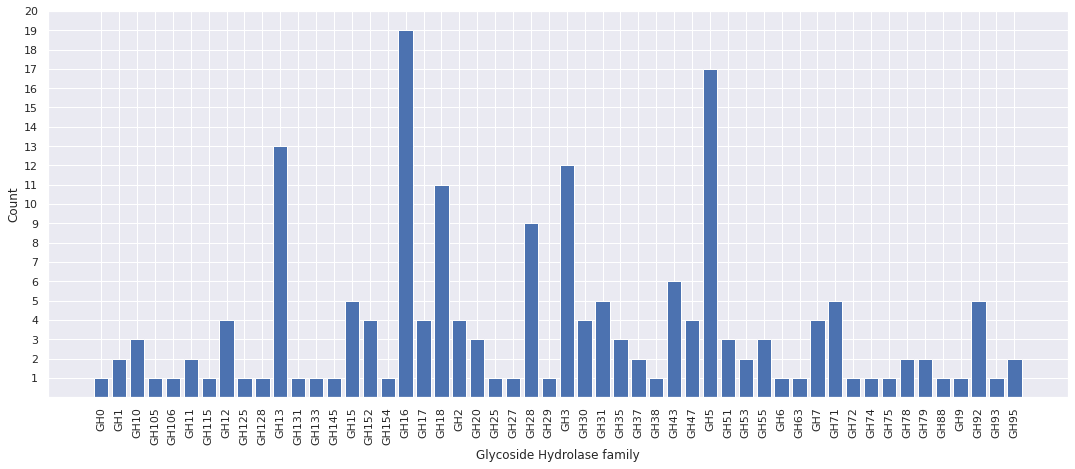

In [31]:
figure,axes = plt.subplots(nrows=1,ncols=1,figsize=(15,6))


labels_sorted = sorted(list(family_count['GH'].items()),key=lambda pair: pair[0][2:])
labels,counts = list(zip(*labels_sorted))

axes.bar(list(range(len(labels))),counts,tick_label=labels)
plt.tight_layout()

#s = pd.Series(family_count["GH"])
#s.plot(ax=axes,kind="bar")
plt.ylabel("Count")
plt.xlabel("Glycoside Hydrolase family")
plt.yticks(range(1,21))
plt.xticks(rotation=90)
plt.savefig('GH-Counts.png',bbox_inches="tight")
plt.show()

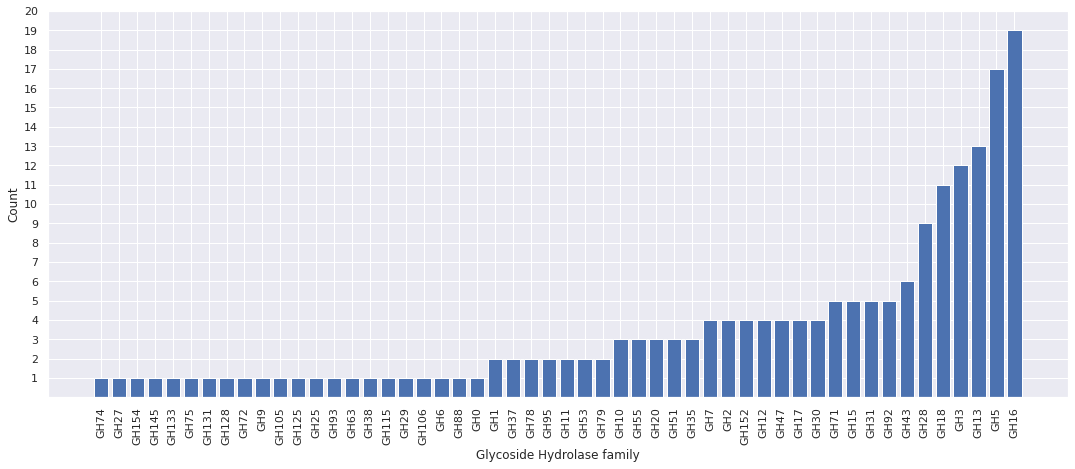

In [34]:
figure,axes = plt.subplots(nrows=1,ncols=1,figsize=(15,6))


labels_sorted = sorted(list(family_count['GH'].items()),key=lambda pair: pair[1])
labels,counts = list(zip(*labels_sorted))

axes.bar(list(range(len(labels))),counts,tick_label=labels)
plt.tight_layout()

#s = pd.Series(family_count["GH"])
#s.plot(ax=axes,kind="bar")
plt.ylabel("Count")
plt.xlabel("Glycoside Hydrolase family")
plt.yticks(range(1,21))
plt.xticks(rotation=90)
plt.savefig('GH-Counts.png',bbox_inches="tight")
plt.show()